### Select the most right and left dendritic tip of the first layer of club neurons and save those points.

* This version uses the merged baseline gcamp instead of the aligned merged DF/F map.
* load the newly saved center of the response file.
* Ask the user to select the two points and save those two points.
* Summmarized on 2021/09/15

In [ ]:
#import the necessary packages.
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, center_of_mass
import pickle
from skimage.segmentation import watershed
from skimage.measure import regionprops_table
import cv2
import seaborn as sb
import pandas as pd
import IPython.display as Disp
from ipywidgets import widgets


### Define a class for selecting an ROI

In [ ]:
class bbox_select():
    %matplotlib notebook 


    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)
        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(255,255,255),1)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)

### Get the path to all the aligned DF/F merged maps (for 800 Hz only). 

In [ ]:
#Get the file path to the merged DF/F map data.
merged_maps_path=[]
#Path for the mered map files
path = '/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection'

#Go through all the files in a directory
for file_name in os.listdir(path):
    if fnmatch.fnmatch(file_name,'*response_center'):
        merged_maps_path.append(os.path.join(path,file_name))
        
merged_maps_path_sorted=sorted(merged_maps_path)

#Print to make sure
for f in merged_maps_path_sorted:
    print(f)

print(len(merged_maps_path_sorted))

/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210712-1-Iav-tdt-7F_00017GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center
/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210712-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center
/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210713-1-Iav-tdt-7F_00005GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center
/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210713-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center
/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210715-1-Iav-tdt-7F_00019GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center
/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210720-1-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center
/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 2

### Go through each map and select dendritic tip from the right and then left

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


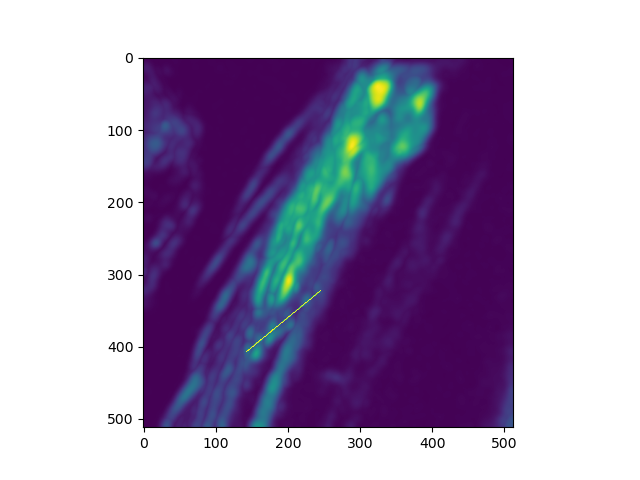

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 0    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


### Test for saving the selected points.

In [ ]:
#We have x (count from the left) and Y coordinates (count from the top) for each point. First the right edge, then the left edge.
roi_polygon.selected_points

[[227.66450216450218, 336.8722943722943],
 [143.16233766233765, 411.6774891774891]]

In [ ]:
#We can round it to an integer and save as numpy array?
dendritic_tips=np.array([np.round(roi_polygon.selected_points)],'int')
print(dendritic_tips)

[[[228 337]
  [143 412]]]


In [ ]:
dendritic_tips[0,0,0]

228

In [ ]:
#Or just keep the subpixel resolution, although we are not sure if it matters
#We can round it to an integer and save as numpy array?
dendritic_tips=np.array([roi_polygon.selected_points])
print(dendritic_tips)

[[[227.66450216 336.87229437]
  [143.16233766 411.67748918]]]


In [ ]:
dendritic_tips[0,0,1]

336.8722943722943

In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210712-1-Iav-tdt-7F_00017GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


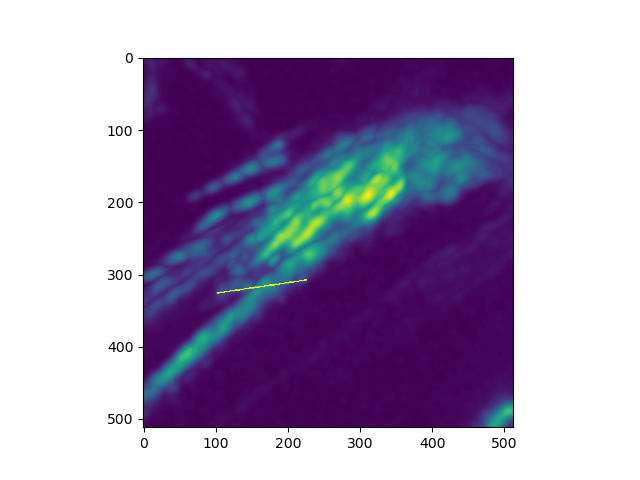

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 1    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210712-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


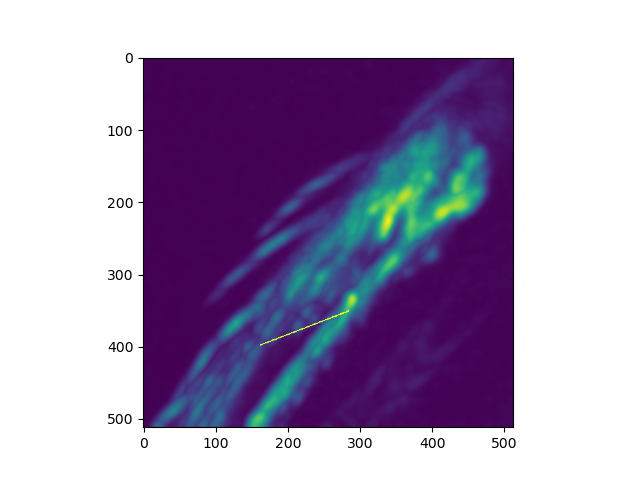

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 2    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210713-1-Iav-tdt-7F_00005GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


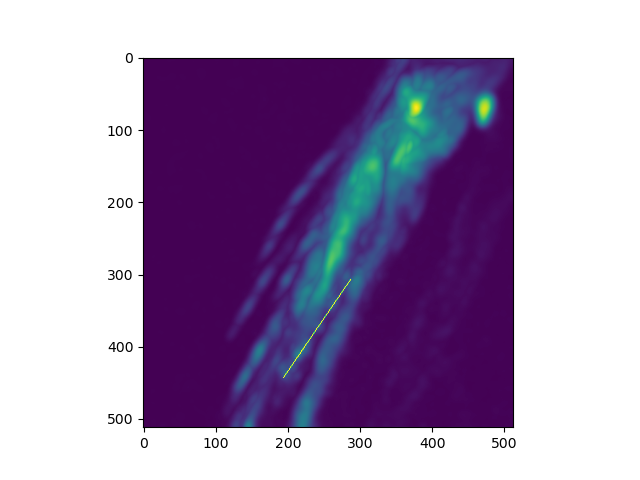

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 3    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210713-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


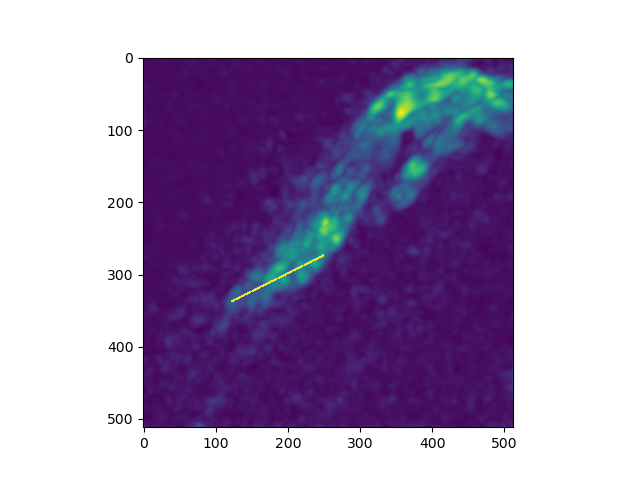

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 4    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210715-1-Iav-tdt-7F_00019GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


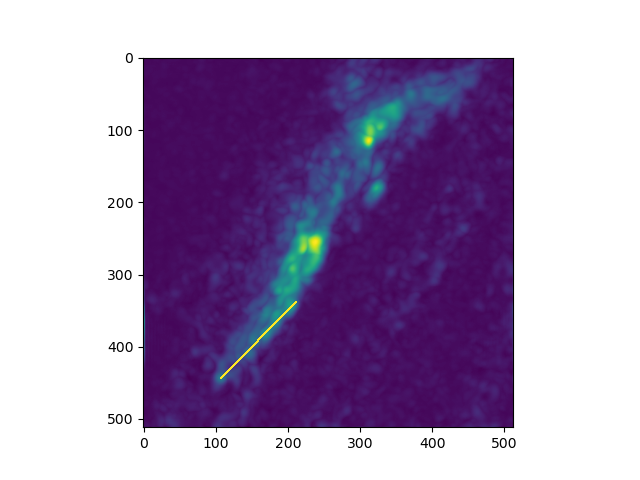

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 5    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210720-1-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


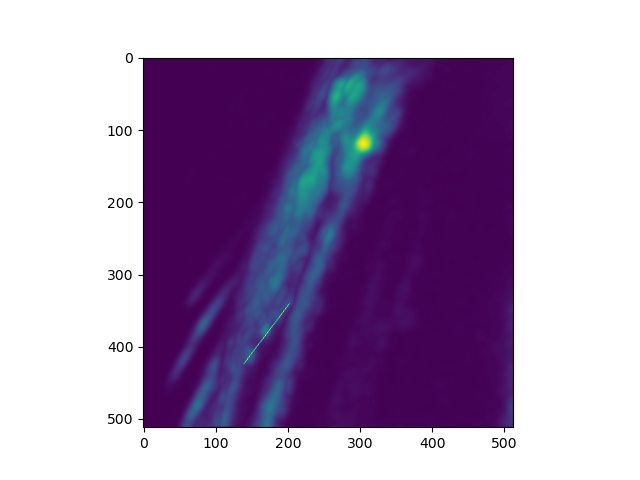

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 6    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210720-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


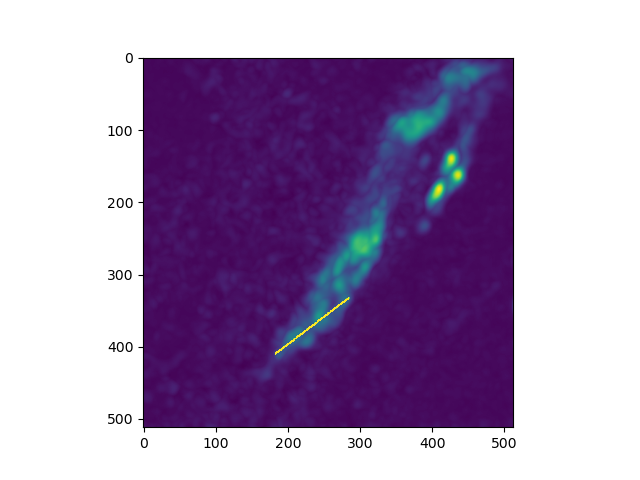

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 7    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210722-4-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


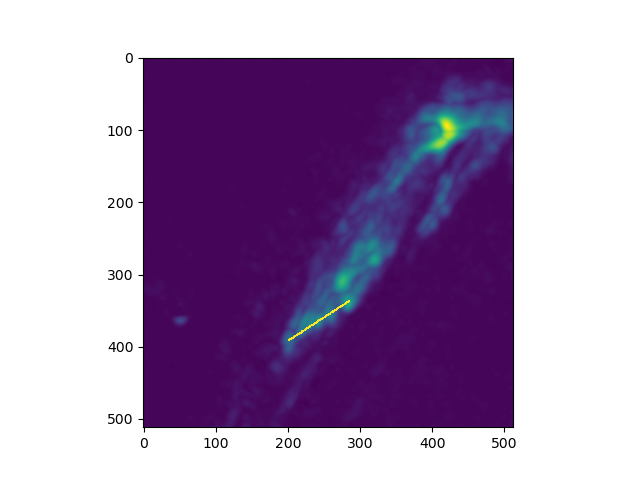

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 8    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210723-2-Iav-tdt-7F_00007GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


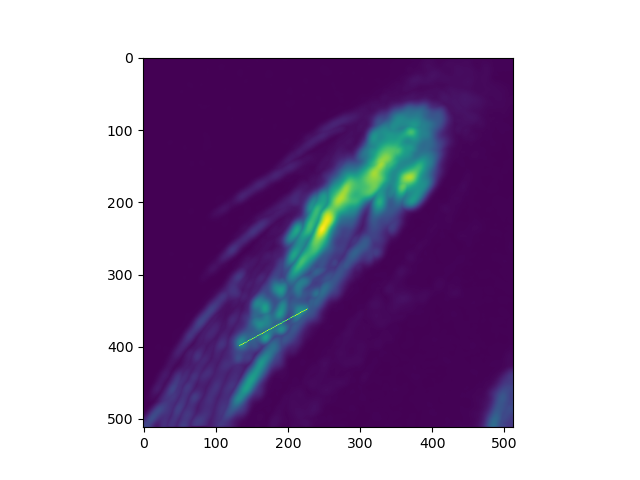

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 9    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210811-1-Iav-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


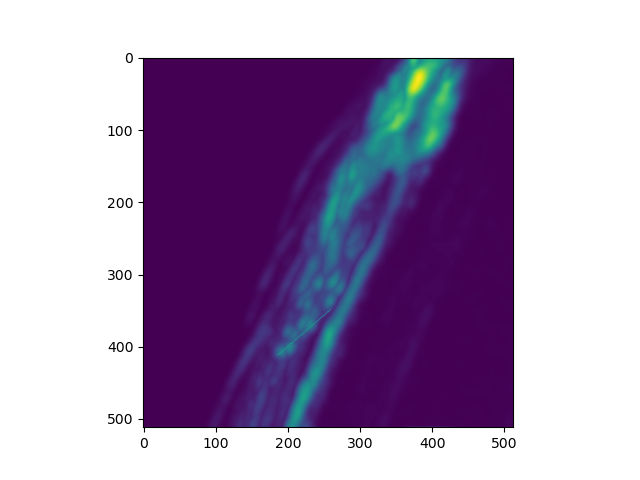

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 10   

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210811-2-Iav-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


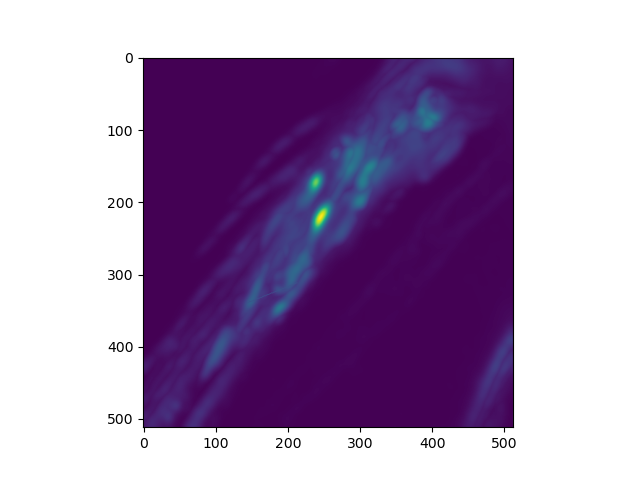

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 11  

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210816-1-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


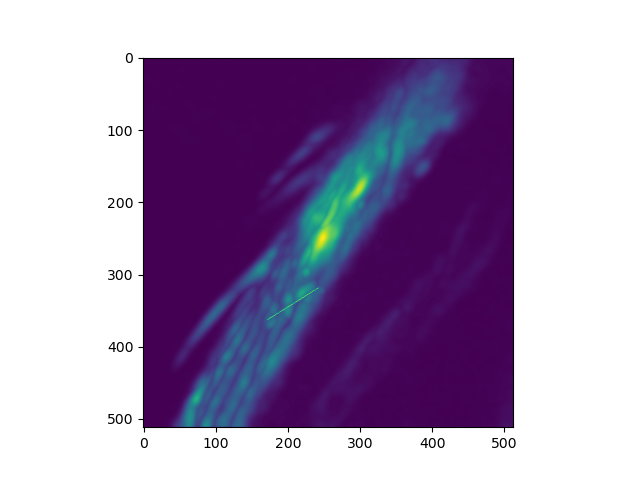

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 12    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210816-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


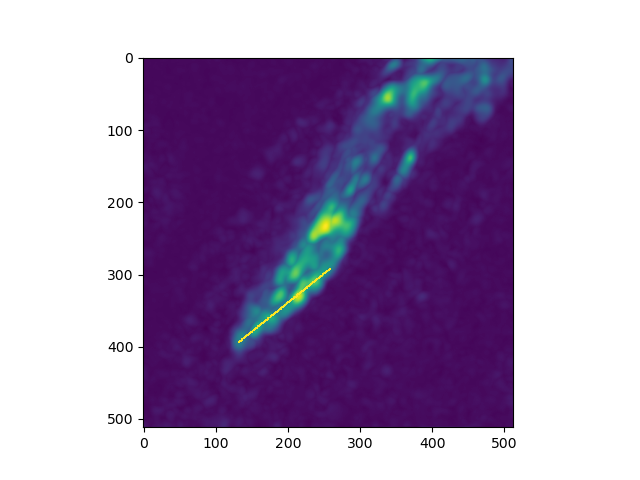

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 13    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210816-3-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


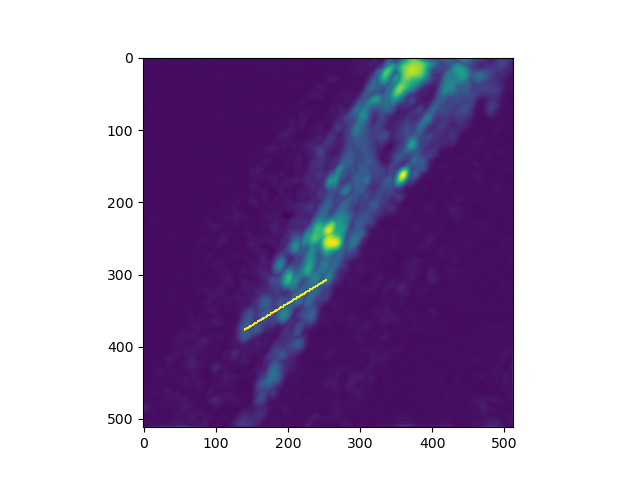

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 14    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210816-4-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


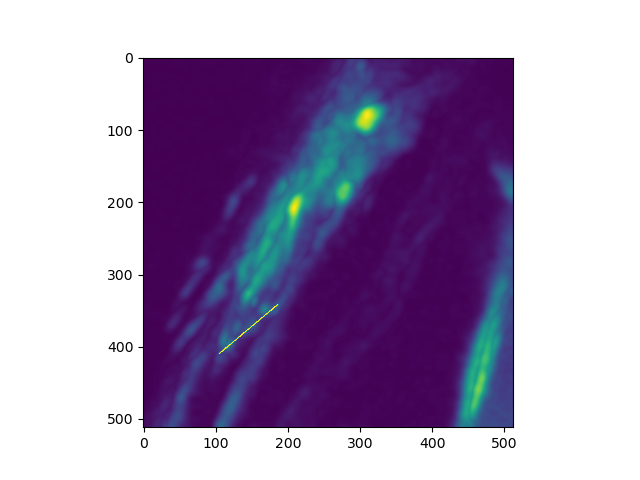

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 15    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210823-1-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


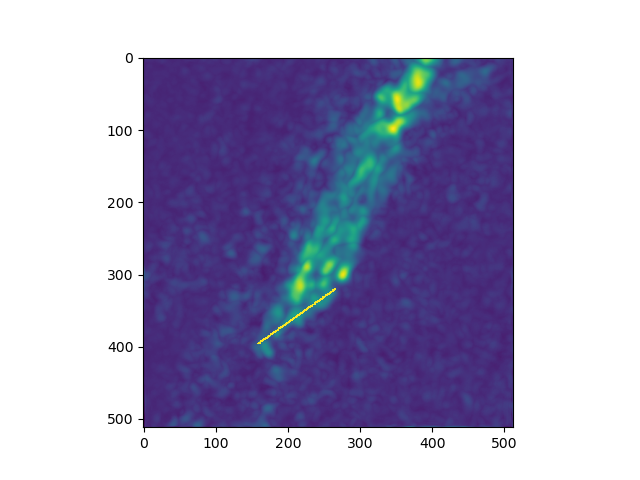

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 16    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(DF_F_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210823-2-Iav-tdt-7F_00004GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip


### Move on to the next trial

select the most right dendritic tip and then the most left dendritic tip


<IPython.core.display.Javascript object>


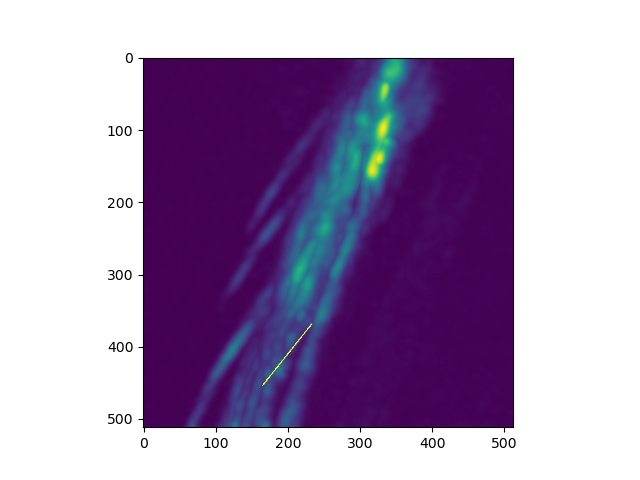

Button(description='Disconnect mpl', style=ButtonStyle())

In [ ]:
#load the merged maps.
trial_number = 17    

with open(merged_maps_path_sorted[trial_number], "rb") as f:
    [base_gcamp_projection, DF_F_projection, response_center]=pickle.load(f)
    
#select ROI
print('select the most right dendritic tip and then the most left dendritic tip')
roi_polygon=bbox_select(base_gcamp_projection)


In [ ]:
#get the points and save it (keep the subpixel resolution for now)
dendritic_tips=np.array([roi_polygon.selected_points])  
outfile=merged_maps_path_sorted[trial_number]+"_tip"

with open(outfile, "wb") as f:
    pickle.dump(dendritic_tips,f)
    
print(outfile)


/media/tuthill-lab/NewDisk/Data/club_vibration/Tip_selection/Copy of 20210823-4-Iav-tdt-7F_00008GCaMP_Filtered_Zs_registered_Zs_maps_mergedresponse_center_tip
